In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
def import_and_clean_data(path):
    data = np.genfromtxt(path, delimiter='\t', skip_header=2, unpack=True)
    
    return np.array(data)

In [4]:
def plot(x, y, title="Plot", ylabel='y', xlabel='x'):
    plt.plot(x, y, 'o')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.grid()
    plt.draw()
    plt.show()

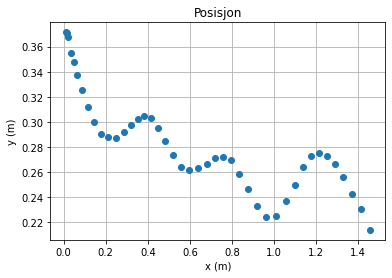

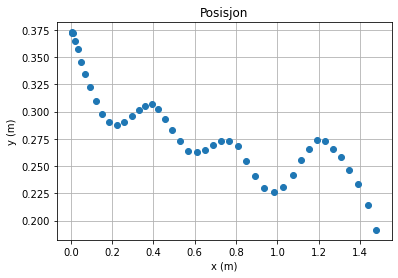

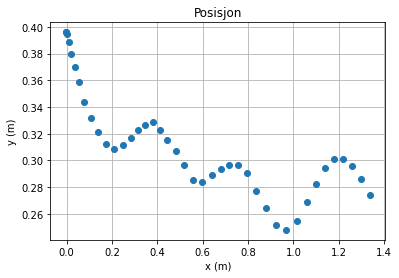

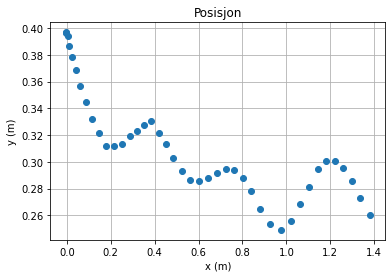

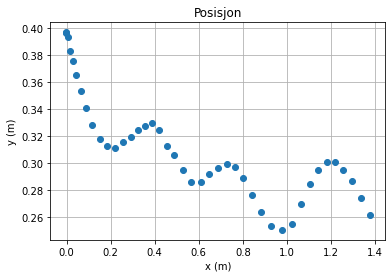

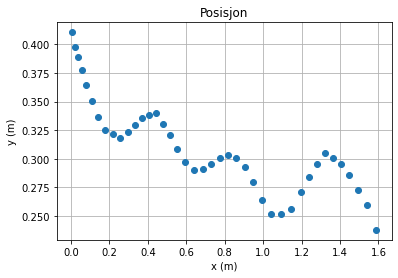

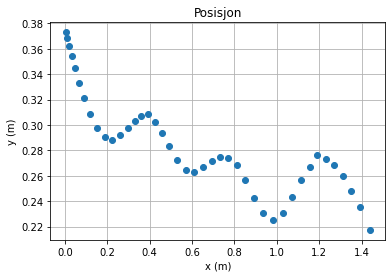

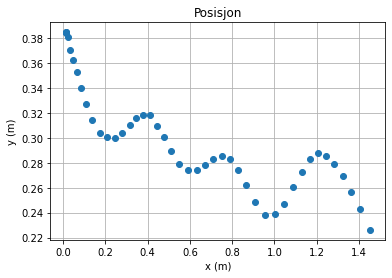

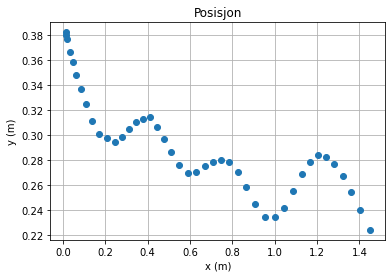

In [5]:
runs = []
for i in range(1, 10):
    runs.append(import_and_clean_data(f"txy_9_{i}.csv"))

for run in runs:
    # Plots y distance over time
    # 0 is time, 1 is x, and 2 is y
    plot(run[1], run[2], title="Posisjon", xlabel="x (m)", ylabel="y (m)")

In [6]:
def get_speed(data):
    time = data[0]
    x_pos = data[1]
    y_pos = data[2]
    dt = time[1:] - time[:-1]
    dx = x_pos[1:] - x_pos[:-1]
    dy = y_pos[1:] - y_pos[:-1]
    vx = dx/dt
    vy = dy/dt

    speeds = np.sqrt(np.square(vx)+np.square(vy))
    return speeds


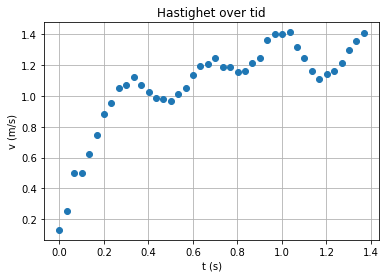

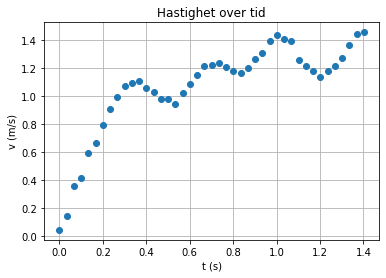

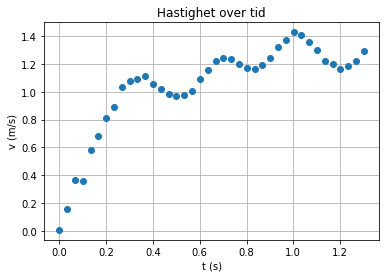

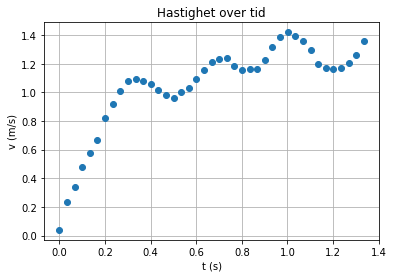

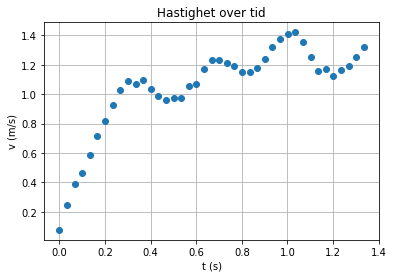

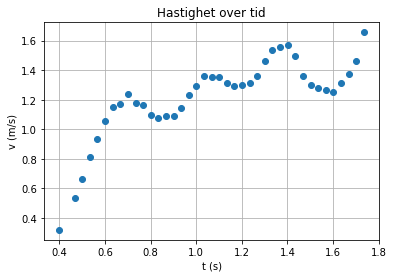

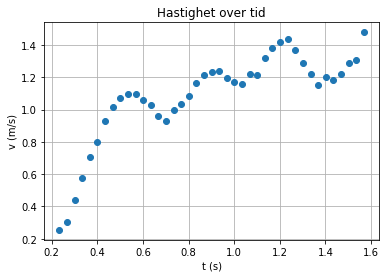

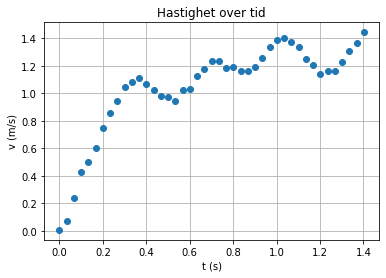

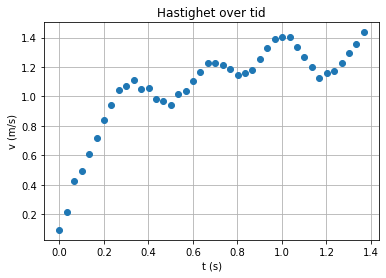

In [7]:

speeds = []
for run in runs:
    speed = get_speed(run)
    speeds.append(speed)
    plot(run[0,:-1], speed, title='Hastighet over tid', xlabel="t (s)", ylabel="v (m/s)")

#plot(data[1:,0], speeds[1:])

In [8]:
def uncertain_final_speed(speeds):
    final_speed = [speed[-1] for speed in speeds]
    average_final_speed = np.average(final_speed)
    standard_deviation = np.std(final_speed)
    standard_error = standard_deviation/np.sqrt(len(final_speed))
    return average_final_speed, standard_error

In [9]:
final_speed = uncertain_final_speed(speeds)
print(f"The final speed of the ball is {final_speed[0]}m/s +/- {final_speed[1]}m/S")

The final speed of the ball is 1.42918647806945m/s +/- 0.03314532930053832m/S


1


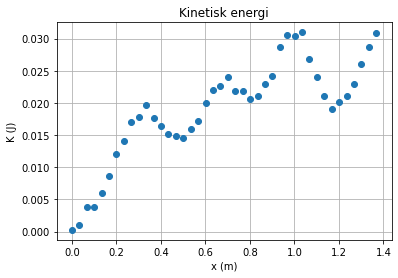

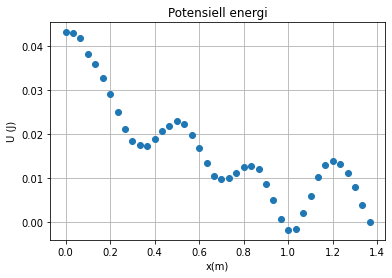

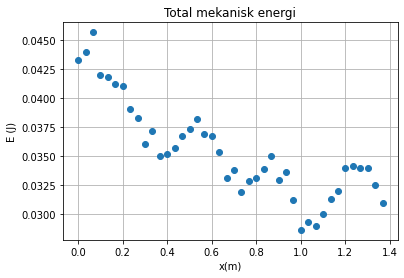

2


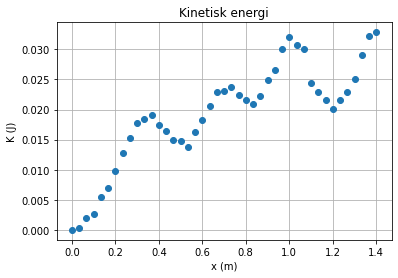

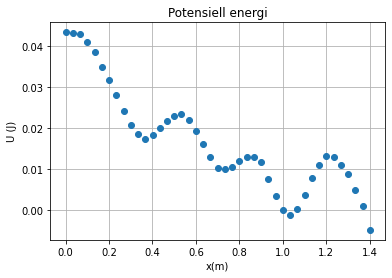

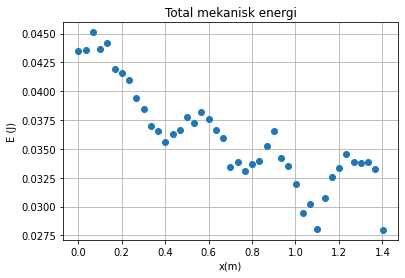

3


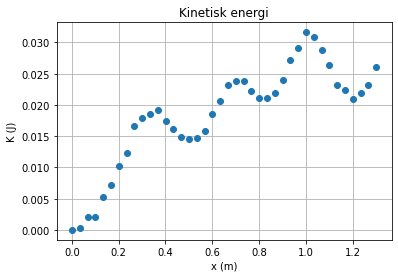

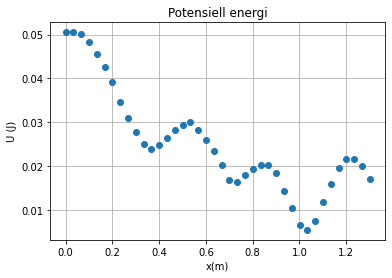

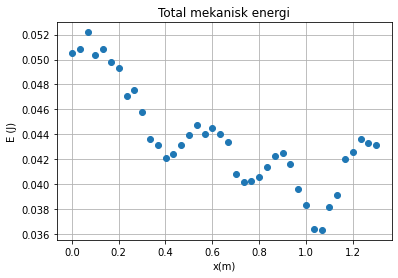

4


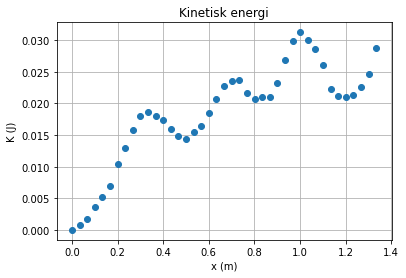

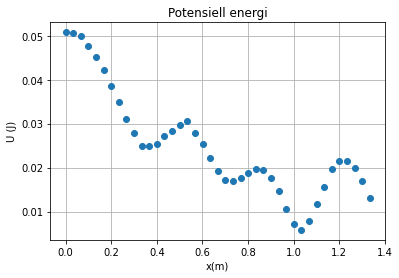

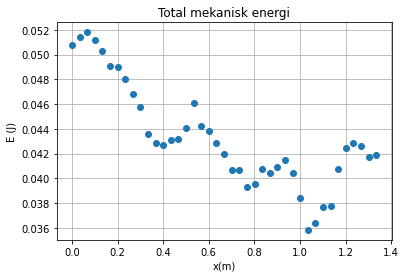

5


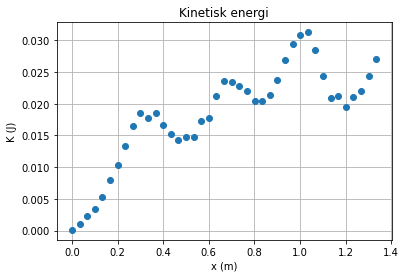

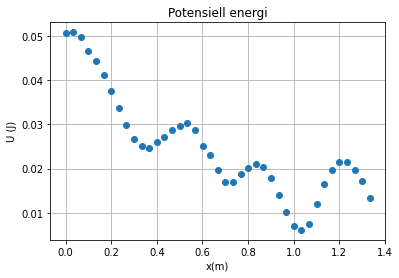

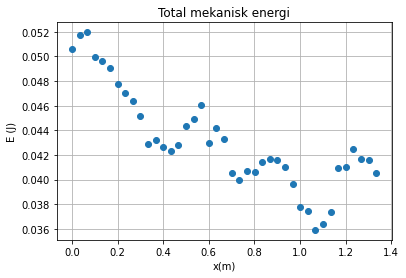

6


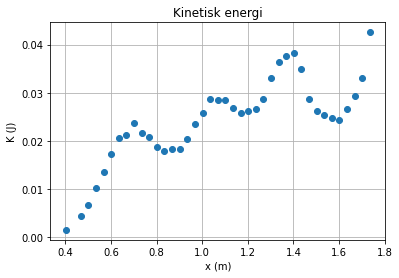

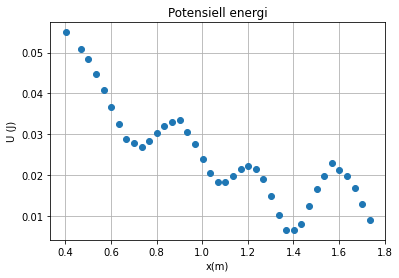

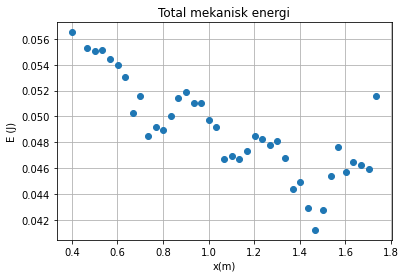

7


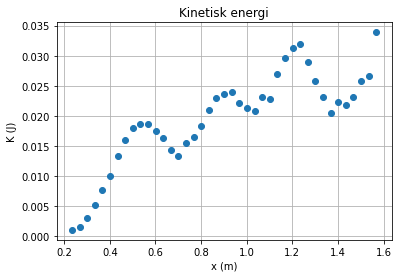

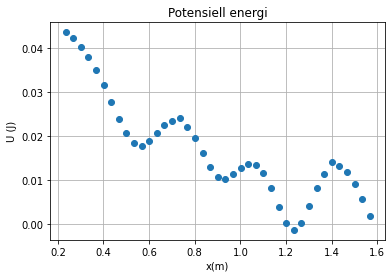

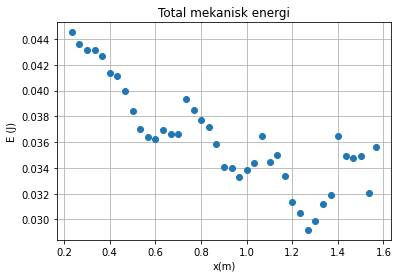

8


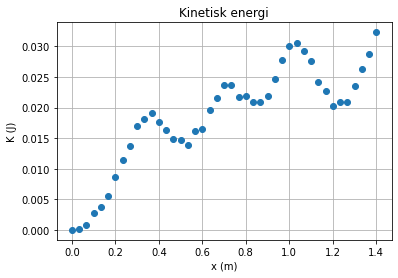

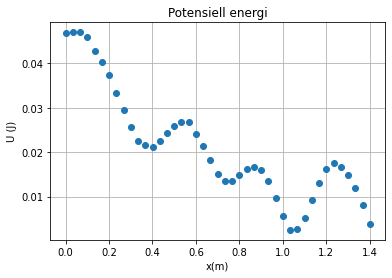

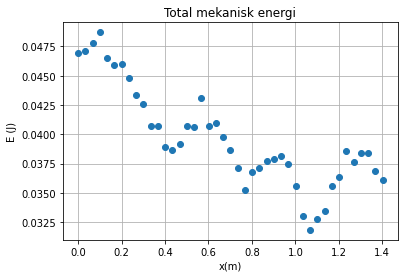

9


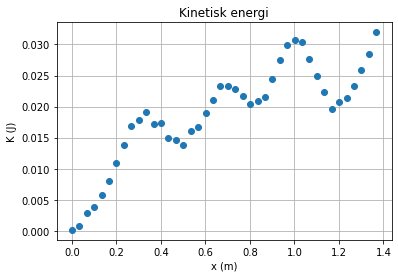

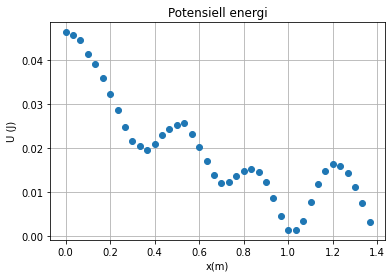

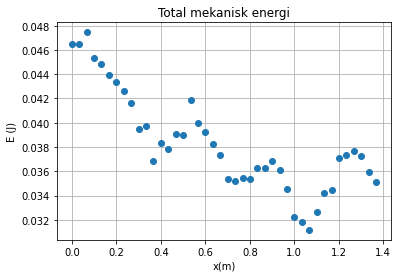

In [10]:

m = 0.031
g = 9.82
for i, run in enumerate(runs):
    #run = runs[2]
    print(i + 1)
    x = run[0,:-1]
    y = run[2,:-1]
    
    kinetic_energy = []
    
    for s in get_speed(run):
        kinetic_energy.append(m * s**2 / 2)
        
    plot(x, kinetic_energy, title="Kinetisk energi", xlabel="x (m)", ylabel="K (J)")
    
    potential_energy = []
    
    for h in y:
        potential_energy.append(m * g * (h - 0.23))
        
     
    plot(x, potential_energy, title="Potensiell energi", xlabel="x(m)", ylabel="U (J)")
    
    plot(x, np.array(potential_energy) + np.array(kinetic_energy), title="Total mekanisk energi", xlabel="x(m)", ylabel="E (J)")
    